In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Statsmodels ile modelleme
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) #veya bu şekilde 
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#df = df.iloc[:,1:len(df)]#indexin değişken olmasını düzeltme

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T# reklam harcaması veriseti bu kalemlerin gider satışları

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()#korelasyon vardır

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
#tv harcamaları arttıkça satışlarda artcak (korelasyon kuvvetli olduğu için)

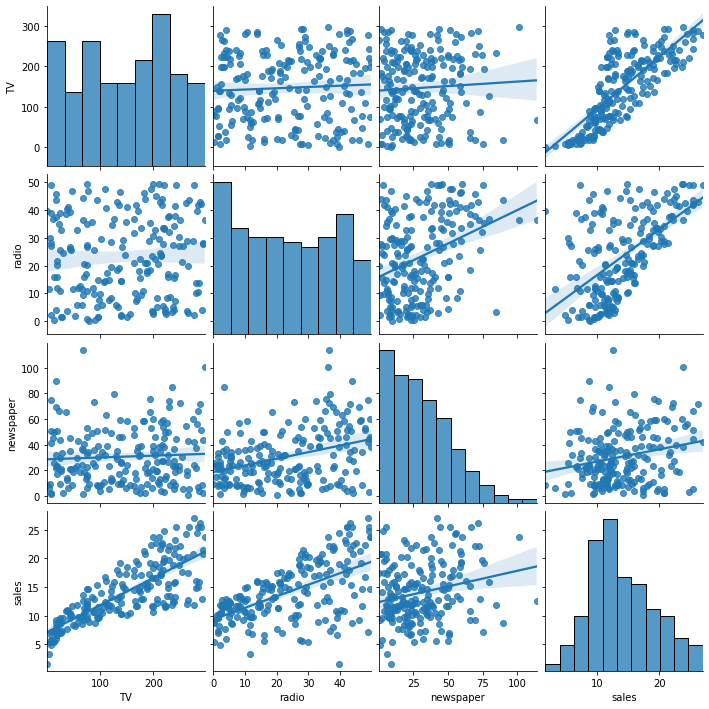

In [9]:
sns.pairplot(df, kind = "reg")

In [10]:
#eğim şiddedi ifade eder aşağı indikçe ilişkinin azaldığını negatif olduğunu gösterir
#gazate diğerlerine göre biraz ççarpık

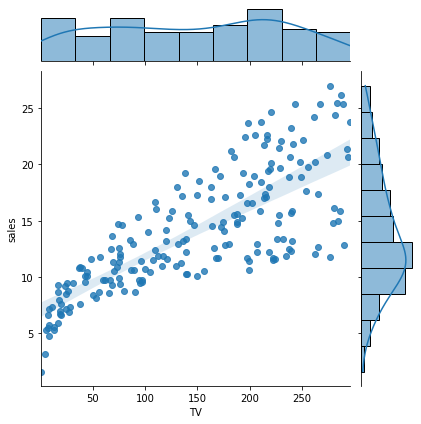

In [11]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [12]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
#elimizde tek değişkenli bir matris var regresyon işleminin çözülmesi için 
#matris işlemlerin yapılması için bir ifadesi eklenecek değişken olarak

In [14]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
#lineer model (modelimizi kuruyoruz) y=bağımlı değişken X=bağımsız değişken
lm = sm.OLS(y,X)

In [17]:
model = lm.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                nan
Time:                        15:08:56   Log-Likelihood:                    nan
No. Observations:                 200   AIC:                               nan
Df Residuals:                     200   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
TV                nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#üsttekinde değerleri alamadık
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        15:08:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#MÜLAKATLARDA BU DEĞERLERİ SORUP ANLAMLI ÇIKARIMAR BEKLİYOLAR
#R-squared: bağımısız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısı (en önemlisi)
#Adj.R-squared: r karenin yeni eklemeler sonucu hataları azaltan bir değerdir (düzeltilmiş r kare değeri)
#F-statistic: modelin anlamlılığının anlaşılması için test istatistiğidir
#Prob (F-statistic): p value değeridir (model anlamldır)
#No. Observations: gözlem değeri
#Df Residuals: serbestlik değeri

#EN ÖNEMLİ KISIM
#B0 B1 ikinci tablodaki const değeridir coef denir
#katsayıların standart hataları verilmiş 
#t istatik verileri ve p value değerleri verilmiş (0.000 yazan kısım)
#son iki değişken (sutun) güven aralığıdır

# B0=const B1=TV değeri

#TV İÇİN
#0.04 kat sayısı istatistiksel olarak anlamlıdır yüzde 95 0.042 ile 0.053 arasındadır
# const ynin beklenen değeridir tvnin etki etmediğindeki standart satış const değerindeli sabit sayıdır (7.0326)
#tv harcamalarında 1 birimlik artış olduğunda satışta 0.0475 artar demektir
#

In [21]:
model.params#b0 ve b1 değerleri

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
model.params[0]

7.032593549127695

In [23]:
model.summary().tables[1]#sadece ikinci tabloyu alırız

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [24]:
model.conf_int()#katsayıların güven aralıkları

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
model.f_pvalue#modelin anlamlığı içinn p value değeri

1.467389700194647e-42

In [26]:
model.fvalue#f istatistiği

312.144994372713

In [27]:
model.tvalues#parametre anlamlılığına iilişkin değerler 

Intercept    15.360275
TV           17.667626
dtype: float64

In [28]:
model.mse_model#hata kareler ortalaması

3314.618166868649

In [29]:
#üstteki modeli değerlendirdik başarısı ile ilgili ilk istatistik
#ortalaması 14 olan bir değişken için birim başına 3314 değer hatası korkunç sayıdır

In [30]:
model.rsquared#açıklanabilirlik oranı gerçek hayat için uygun

0.611875050850071

In [31]:
model.rsquared_adj#düzeltilmiş r kare

0.6099148238341623

In [32]:
model.fittedvalues[0:5]#tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
#model kurduk denklemini ele alıcaz matemiksel bir fonksiyon olduğunda gözlenmeyen
#x değerlerini gelince bu değerleri yerine yazıyoruz kat sayılarla çarpılıyo ve
#tahmin değeri çıkıyor

#MÜLAKATTAN SORU
#çoklu doğrussal regresyonun denklemini yazın
print("Sales = "+ str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


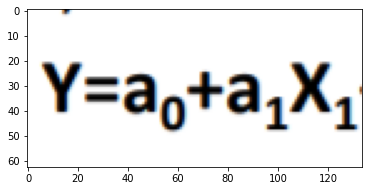

In [35]:
img = mpimg.imread('a.png')
imgplot = plt.imshow(img)
plt.show()

In [36]:
#Sales = 7.03 + TV*0.05
#müdürn verdiği bütçeyi tv yerine yazıp değeri tahmin ederiz
#makine öğrenmesi ile hata değerini bulur onla beraber 
#tahminleri yakınlaştırız

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 28.27)

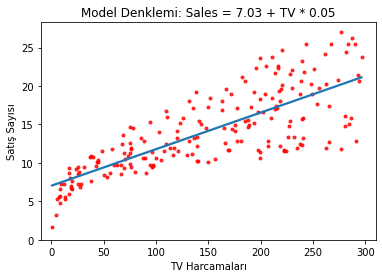

In [37]:
#geometrik formu
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_

7.032593549127695

In [41]:
model.coef_

array([0.04753664])

In [42]:
model.score(X,y)#bu skor r2 değeridir

0.611875050850071

In [43]:
model.predict(X)[0:10]#tahmin edilen değerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [44]:
#TAHMİN

In [45]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        15:09:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Model denklemi:
#Sales = 7.03 + TV*0.04
#örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur

In [47]:
7.03 + 30*0.04 

8.23

In [48]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model

LinearRegression()

In [49]:
model.predict([[30]])#kendisine girilen değeri bu modele gönderecek buna yönelik olarak çıktı verecek

array([8.45869276])

In [50]:
yeni_veri = [[5],[90],[200]]

In [51]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [52]:
#Makine Öğrenmesi Artıklar Önemi

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [55]:
# y = gerçek değerler model.fittedvalues = tahmin değerleri
mse = mean_squared_error(y, model.fittedvalues) #tahmin edilen değerler ile gerçek değerler arasındaki farkların karelerinin ortalaması

In [56]:
mse#birim başına ortalama hata

10.512652915656757

In [57]:
rmse = np.sqrt(mse) # hata kareler ortalamasının kara kökü
rmse

3.2423221486546887

In [58]:
#regresyon modelimiz
reg.predict(X)[0:10]# tahmin işlemi

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
y[0:10]

In [59]:
k_t = pd.DataFrame({"gercek_y":y[0:10],
                    "tahmin_y":reg.predict(X)[0:10]})
#karşılaştırma tablosu
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [60]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"] 

In [61]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [62]:
k_t["hata_kare"] = k_t["hata"]**2#karesini alıyoruzki yön değerleri kaybolsun
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [63]:
np.sum(k_t["hata_kare"]) 

92.90350329638102

In [64]:
np.mean(k_t["hata_kare"])#hata kareler değeri MSE

9.290350329638102

In [65]:
np.sqrt(np.mean(k_t["hata_kare"])) #RMSE

3.048007599996775

In [66]:
#yapay sinir ağlarında gerçek değerler tahmin değerleri ve hatalar (artıklar)
#HATAYI SUNMA ŞEKLİ HATALARIN DAĞILIMINA BAKMAK GEREKİR

In [67]:
model.resid[0:10]#artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

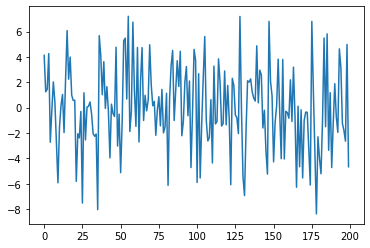

In [68]:
plt.plot(model.resid)# 7 8 civarındakiler sıkıntılı değerler